# Linear Regression to predict post-test score of students in different schools & areas

In [197]:
import pandas as pd 
import matplotlib.pyplot as plt 

## 1. Import & Inspect data

import dataset


In [198]:
df = pd.read_csv('test_scores.csv')
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


Understand about the dataset

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


check for duplicated values

In [200]:
df.duplicated().sum()

0

## Explore data characteristics

## Distribution of some Attributes

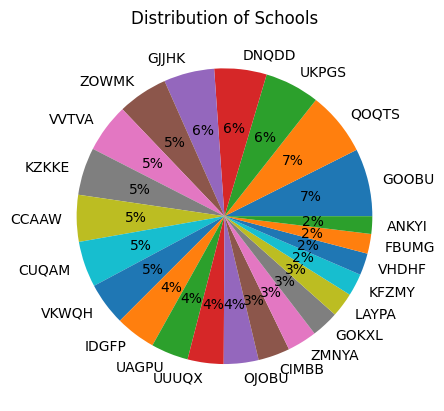

In [201]:
school = df['school'].value_counts()

plt.pie(school, labels=school.index, autopct='%.0f%%')
plt.title("Distribution of Schools")
plt.show()

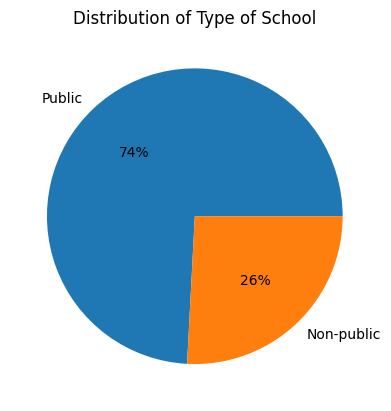

In [202]:
school_type = df['school_type'].value_counts()

plt.pie(school_type, labels=school_type.index, autopct='%.0f%%')
plt.title("Distribution of Type of School")
plt.show()

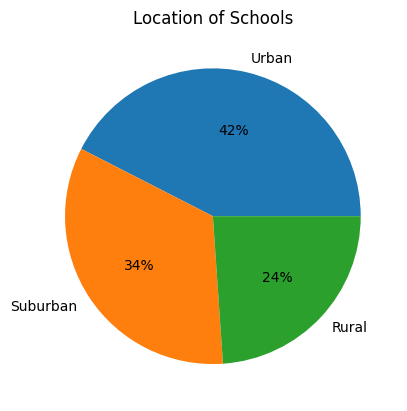

In [203]:
school_setting = df['school_setting'].value_counts()

plt.pie(school_setting, labels=school_setting.index, autopct='%.0f%%')
plt.title("Location of Schools")
plt.show()

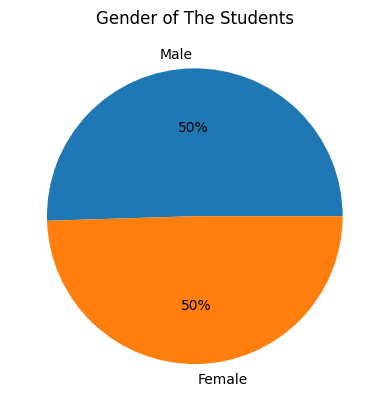

In [204]:
gender = df['gender'].value_counts()

plt.pie(gender, labels=gender.index, autopct='%.00f%%')
plt.title("Gender of The Students")
plt.show()

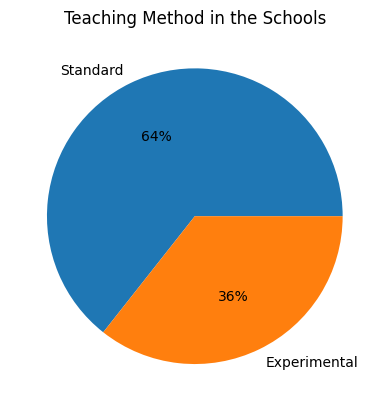

In [205]:
teach_method = df['teaching_method'].value_counts()

plt.pie(teach_method, labels=teach_method.index, autopct='%.0f%%')
plt.title("Teaching Method in the Schools")
plt.show()

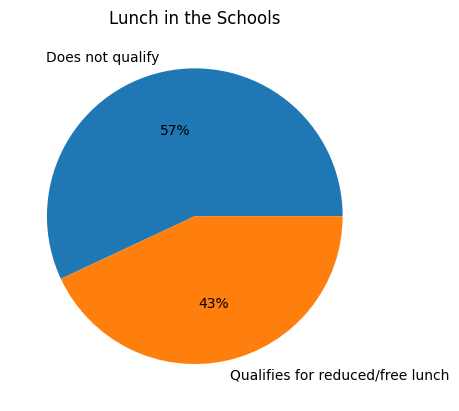

In [206]:
lunch = df['lunch'].value_counts()

plt.pie(lunch, labels=lunch.index, autopct='%.0f%%')
plt.title("Lunch in the Schools")
plt.show()

In [207]:
df.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


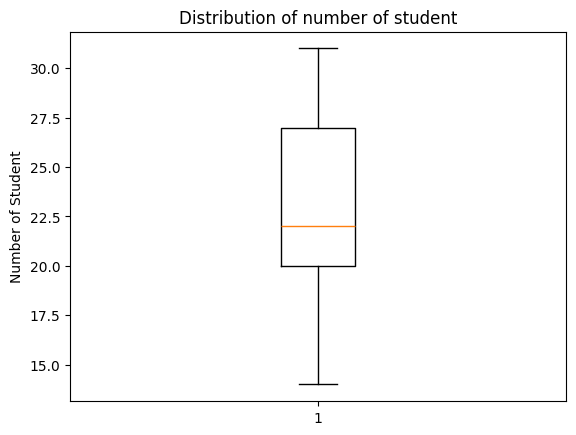

In [208]:
plt.boxplot(df['n_student'])
plt.title('Distribution of number of student')
plt.ylabel('Number of Student')
plt.show()

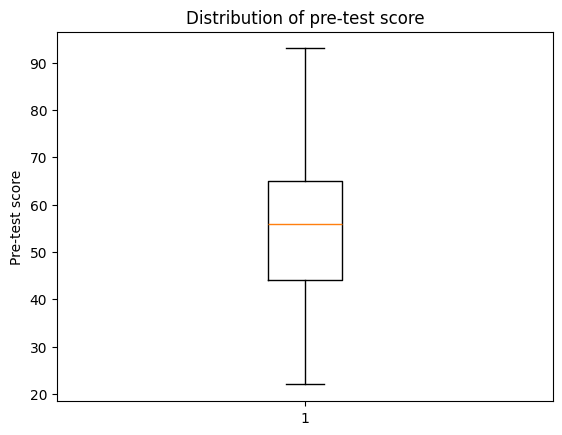

In [209]:
plt.boxplot(df['pretest'])
plt.title('Distribution of pre-test score')
plt.ylabel('Pre-test score')
plt.show()

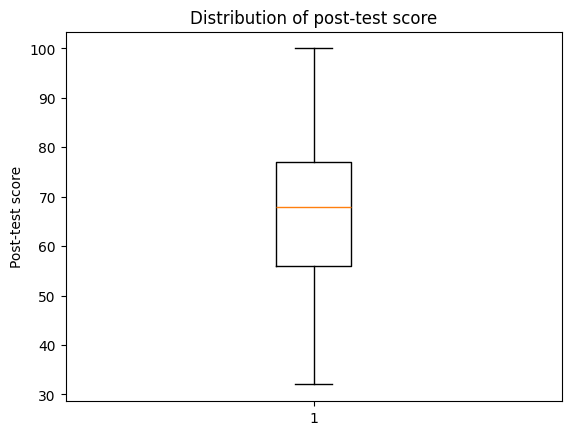

In [210]:
plt.boxplot(df['posttest'])
plt.title('Distribution of post-test score')
plt.ylabel('Post-test score')
plt.show()

## Perform Data Transformation

drop irrelevant columns

In [211]:
df.drop(columns=['student_id', 'classroom'], inplace=True)
df

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,Standard,30.0,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,Standard,30.0,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,Standard,30.0,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,Standard,30.0,Male,Qualifies for reduced/free lunch,46.0,53.0


Convert categorical values to quantitative using one-hot encoding

In [212]:
categoricalColumns = df.loc[:, ['school', 'school_setting', 'school_type', 'teaching_method', 'gender', 'lunch']]
categoricalEncoder = pd.get_dummies(categoricalColumns, dtype=float)

In [213]:
categoricalEncoder['n_student'], categoricalEncoder['pretest'], categoricalEncoder['posttest'] = [df['n_student'], df['pretest'], df['posttest']]
encoded_df = categoricalEncoder

Visualize data relationships

Draw heatmap to see correlation between variables

In [214]:
import seaborn as sns

<Axes: >

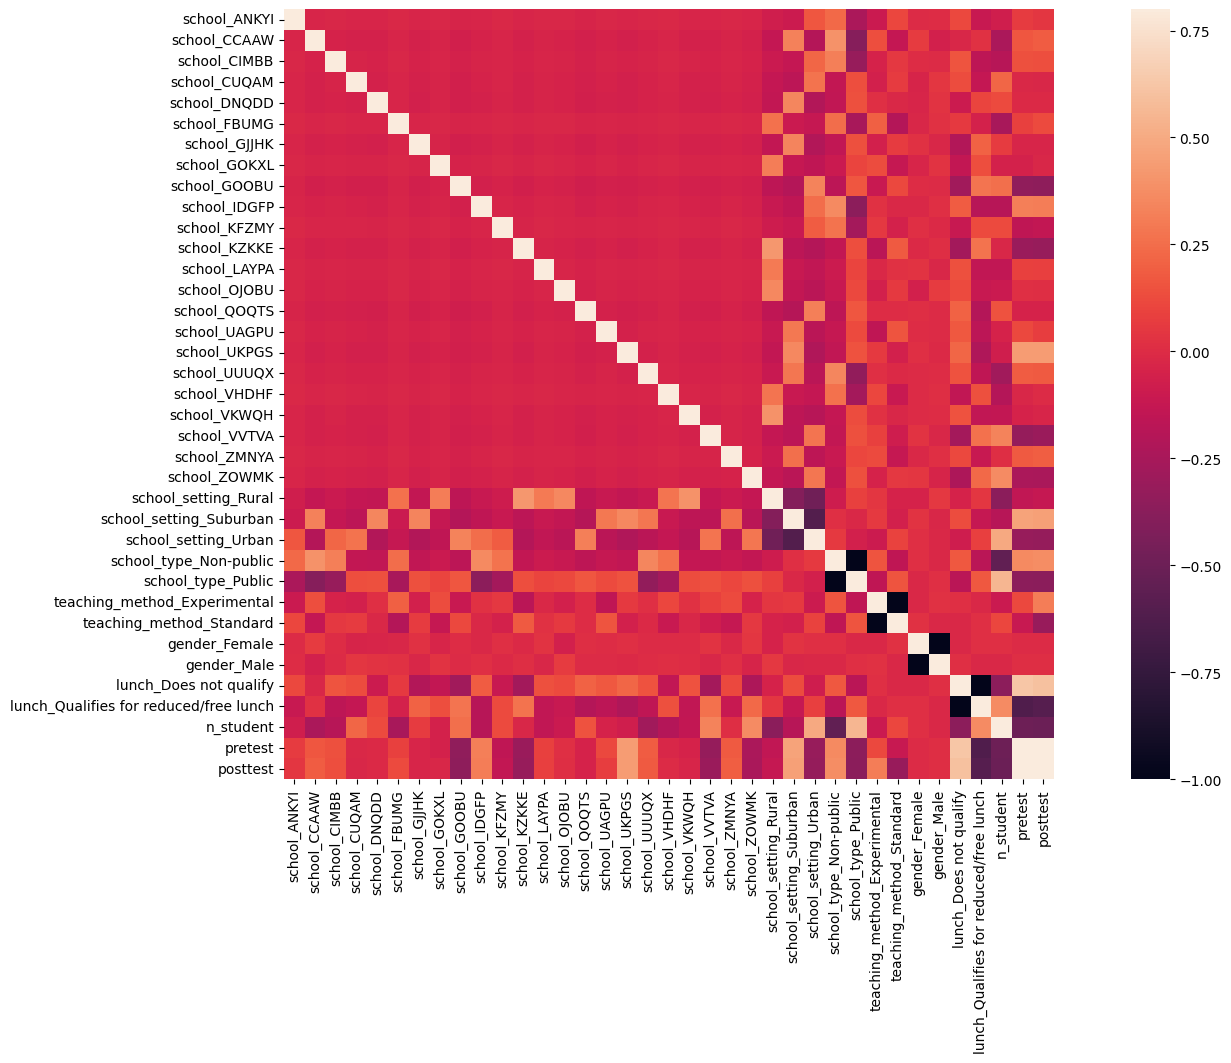

In [215]:
corrmat = encoded_df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corrmat, vmax=0.8, square=True)

Continue remove unnecessary features (have correlation = 0, which take a large part of the graph)

In [216]:
categoricalColumns = df.loc[:, ['school_setting', 'lunch']]
categoricalEncoder = pd.get_dummies(categoricalColumns, dtype=float)

In [217]:
categoricalEncoder['n_student'], categoricalEncoder['pretest'], categoricalEncoder['posttest'] = [df['n_student'], df['pretest'], df['posttest']]
encoded_df = categoricalEncoder

<Axes: >

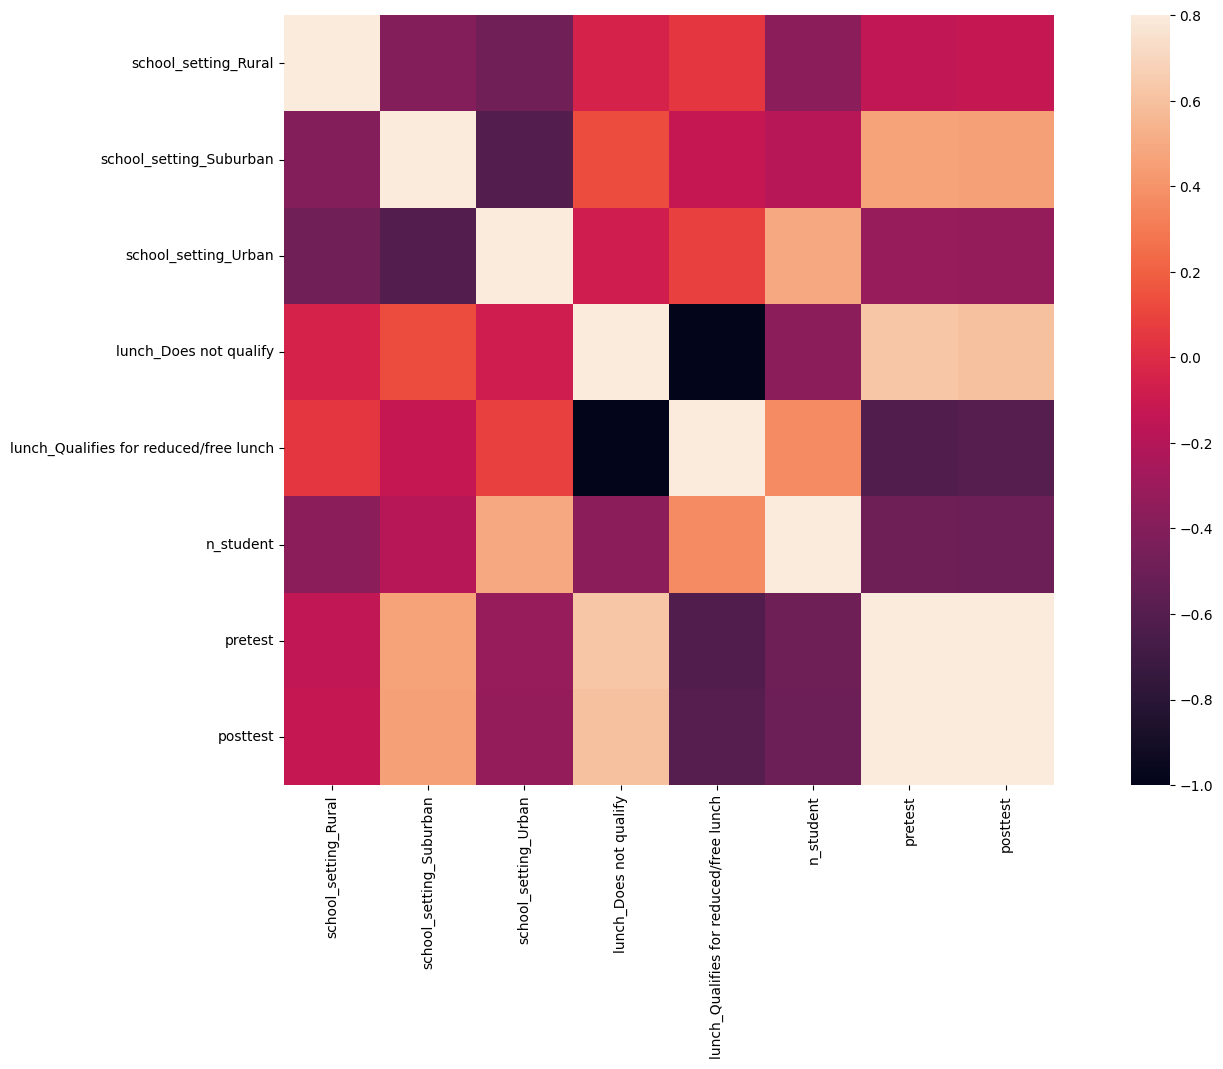

In [218]:
corrmat = encoded_df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corrmat, vmax=0.8, square=True)

Since only the correlation between pre-test and post-test above 0.8, we will build a regression model to predict the post-test score base on the pre-test score. First draw scatterplot to see the relationship of these two

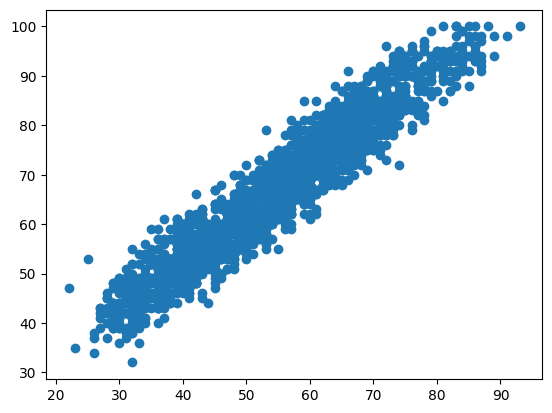

In [228]:
plt.scatter(encoded_df['pretest'], encoded_df['posttest'])

From the graph, it is obviously most suitable to linear regression

In [220]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np 

In [221]:
X = encoded_df['pretest'].to_numpy().reshape(-1, 1)
y = encoded_df['posttest']

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [223]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

Calculate the accuracy of the model

In [224]:
pred = lin_reg.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test, pred))
print(f'mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3})%')

mean error: 4.38 (6.49)%


Visualize the prediction

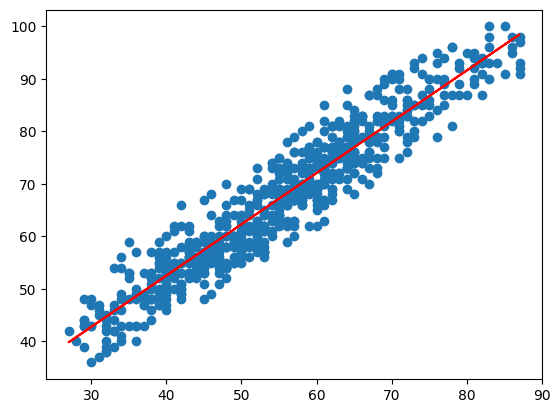

In [225]:
plt.scatter(X_test, y_test)
plt.plot(X_test, pred, color='red')

In [226]:
from sklearn.preprocessing import PolynomialFeatures

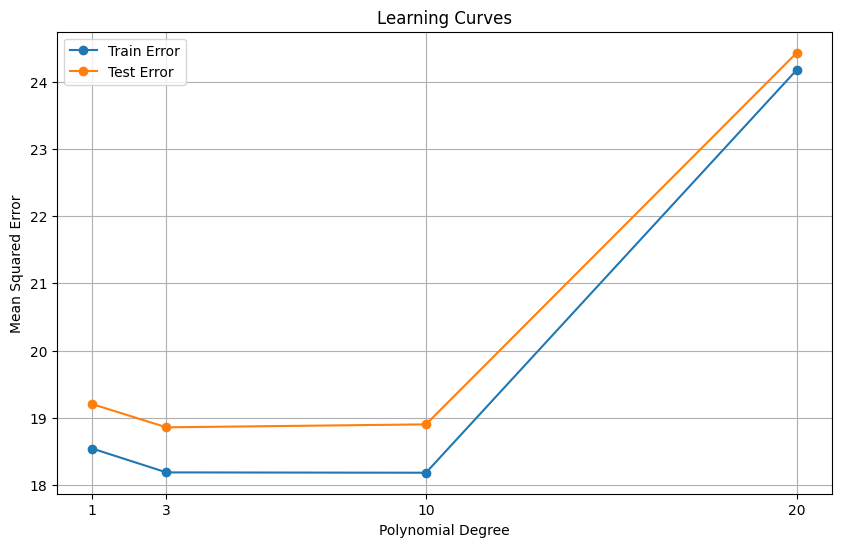

In [227]:
degrees = [1, 3, 10, 20]
train_error = []
test_error = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.fit_transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    train_prediction = model.predict(X_poly_train)
    test_prediction = model.predict(X_poly_test)

    train_error.append(mean_squared_error(train_prediction, y_train))
    test_error.append(mean_squared_error(test_prediction, y_test))

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_error, label="Train Error", marker='o')
plt.plot(degrees, test_error, label="Test Error", marker='o')
plt.title('Learning Curves')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.xticks(degrees)
plt.legend()    # notation for the curves
plt.grid(True)
plt.show()